In [36]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def creacion_dataset(folder):
    
    imagenes = []
    etiquetas = []
    etiquetas_clases = os.listdir(folder)
    
    for etiqueta in etiquetas_clases:
        
        class_path = os.path.join(folder, etiqueta)
        if not os.path.isdir(class_path):
            continue
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64)) # Redimensionamos la imagen
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertimos a escala de grises
                img = img.astype("float32") / 255.0 # "Normalizamos" el arreglo dividiendo entre 255
                imagenes.append(img.flatten())
                etiquetas.append(etiqueta)
                
    return np.array(imagenes), np.array(etiquetas)

X, Y = creacion_dataset('C:\\Users\\Felipe\\Desktop\\Samsung\\PF\\Data_set')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Tamaño de train: {len(X_train)}, Tamaño de test: {len(X_test)}')

Tamaño de train: 12000, Tamaño de test: 3000


In [22]:
param_grid = {'C': [0.1, 1, 10, 100], "kernel":["linear", "rbf", "poly"]}

# Usar GridSearchCV para encontrar el mejor valor de C
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, Y_train)

# Ver el mejor valor de C
print(f'Best C: {grid_search.best_params_["C"]}')
print(f'Best kernel: {grid_search.best_params_["kernel"]}')

# Evaluar el modelo con el mejor C
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con el mejor C y kernel: {accuracy:.2f}')

Best C: 10
Best kernel: rbf
Precisión con el mejor C y kernel: 0.88


In [9]:
mejor_svm = SVC(kernel = "rbf", C=10)
mejor_svm.fit(X_train, Y_train)

y_pred = mejor_svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con el mejor C y kernel: {accuracy:.2f}')

Precisión con el mejor C y kernel: 0.88


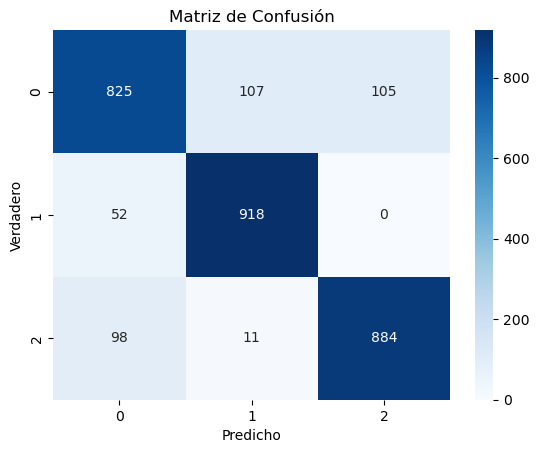

In [10]:
# Crear la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizarla con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

In [11]:
print(classification_report(Y_test, y_pred))

                     precision    recall  f1-score   support

lung_adenocarcinoma       0.85      0.80      0.82      1037
       lung_benigno       0.89      0.95      0.92       970
     lung_carcinoma       0.89      0.89      0.89       993

           accuracy                           0.88      3000
          macro avg       0.88      0.88      0.88      3000
       weighted avg       0.87      0.88      0.87      3000



In [ ]:
log_reg = LogisticRegression(max_iter=3000)

param_grid = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l2", "none"], "solver":["liblinear", "lbfgs", "saga"]}

grid_search_lrm = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1)

grid_search_lrm.fit(X_train, Y_train)

# Mejor modelo y sus parámetros
print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor precisión obtenida: ", grid_search.best_score_)

# Mejor modelo y sus parámetros
print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor precisión obtenida: ", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Felipe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [34]:
img = cv2.imread('C:\\Users\\Felipe\\Desktop\\Samsung\\PF\\Imagenes de prueba\\ben1.png')
img = cv2.resize(img, (64, 64)) # Redimensionamos la imagen
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertimos a escala de grises
img = img.astype("float32") / 255.0 # "Normalizamos" el arreglo dividiendo entre 255
img = img.flatten()

In [35]:
mejor_svm.predict([img])

array(['lung_benigno'], dtype='<U19')